## __Markowitz Portfolio Optimization__
`Vansh Agarwal B21AI042`$\;\;\;$`Dawale Smruti Suhas B21BB007`$\;\;\;$`Samaksh Verma B21AI037`$\;\;\;$`Sharonya Jain B21ES019`
***

### __Imports__

In [15]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import yfinance as yf
from scipy import optimize


### __DataSet Download & Visualisation__

In [16]:
start_date = '2023-08-23'
end_date = '2023-12-31'

''' The commented line contains dataset for 10 assets. 
Currently, we have used only 6 assets (as shown in succeeding line),
since it gives a more defined Markowitz bullet '''

# df_0 = yf.download('AMZN AAPL GOOG MSFT SHY GLD XOM TSLA TLT IBM', start=start_date,  end= end_date, progress=False)["Close"]
df_0 = yf.download('AMZN AAPL GOOG MSFT GLD XOM', start=start_date,  end= end_date, progress=False)["Close"]
n_assets = df_0.shape[1]

df_0.head(5)



Ticker,AAPL,AMZN,GLD,GOOG,MSFT,XOM
Date,,,,,,
2023-08-23,181.119995,135.520004,177.889999,133.210007,327.000000,107.150002
2023-08-24,176.380005,131.839996,177.850006,130.419998,319.970001,106.349998
2023-08-25,178.610001,133.259995,177.619995,130.690002,322.980011,108.250000
2023-08-28,180.190002,133.139999,178.130005,131.789993,323.700012,109.160004
2023-08-29,184.119995,134.910004,179.869995,135.490005,328.410004,109.809998


Text(0.5, 1.0, 'Returns')

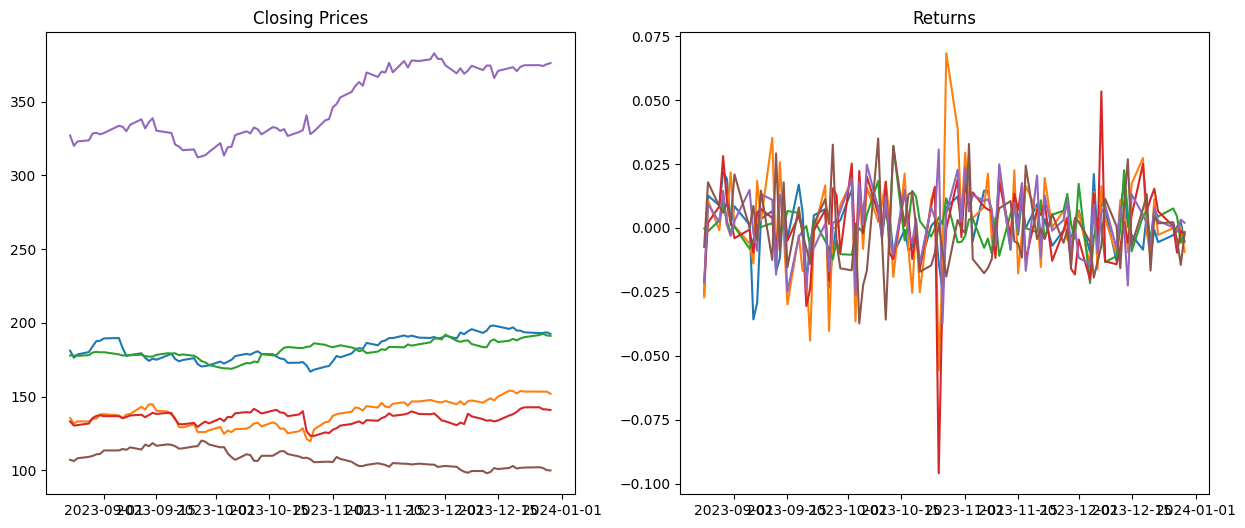

In [17]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax0.plot(df_0)
ax0.set_title("Closing Prices")
ax1.plot(df_0.pct_change())
ax1.set_title("Returns")

### __Returns on each Asset__

$$
K(n) = \frac{S(n)-S(n-1)}{S(n-1)} \hspace{1cm}
k(n) = ln \frac{S(n)}{S(n-1)}
$$



In [18]:
def display_portfolio(portfolio:np.ndarray):
  # Utility for displaying portfolio 
  for i, col in enumerate(df_0.columns):
    print(f"{col}={np.round(portfolio[i], 3)}", end="\t")

log_ret = np.log(df_0/df_0.shift(1))
# ret = (df_0 - df_0.shift(1))/df_0.shift(1)
m = np.array(log_ret.mean(axis=0))
C = np.array(log_ret.cov())

log_ret.head()
    

Ticker,AAPL,AMZN,GLD,GOOG,MSFT,XOM
Date,,,,,,
2023-08-23,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-24,-0.026519,-0.027530,-0.000225,-0.021167,-0.021733,-0.007494
2023-08-25,0.012564,0.010713,-0.001294,0.002068,0.009363,0.017708
2023-08-28,0.008807,-0.000901,0.002867,0.008382,0.002227,0.008371
2023-08-29,0.021576,0.013207,0.009721,0.027688,0.014446,0.005937


In [60]:
# showing risk and return for each asset 
risks = np.sqrt(np.round(C.diagonal(), 4))
risk_ret = pd.DataFrame(np.vstack((df_0.columns, m, risks)).T, columns=["Asset", "Risk", "Return"])
risk_ret


,Asset,Risk,Return
0,AAPL,0.000686,0.01
1,AMZN,0.001285,0.02
2,GLD,0.000809,0.01
3,GOOG,0.000633,0.017321
4,MSFT,0.00157,0.014142
5,XOM,-0.000778,0.014142


### __Markowitz Bullet__

$
Let\;w\;be\;the\;portfolio.\;Then\\
\mu_v = mw^T\hspace{1cm} 
\sigma_v^2 = wCw^T\hspace{1cm}
\ S.Ratio = \frac{\mu_v}{\sigma_v}
$


Portfolio with Min risk:
AAPL=0.094	AMZN=0.012	GLD=0.525	GOOG=0.01	MSFT=0.223	XOM=0.135	

Portfolio with Max Sharpe Ratio:
AAPL=0.007	AMZN=0.009	GLD=0.459	GOOG=0.024	MSFT=0.479	XOM=0.023	

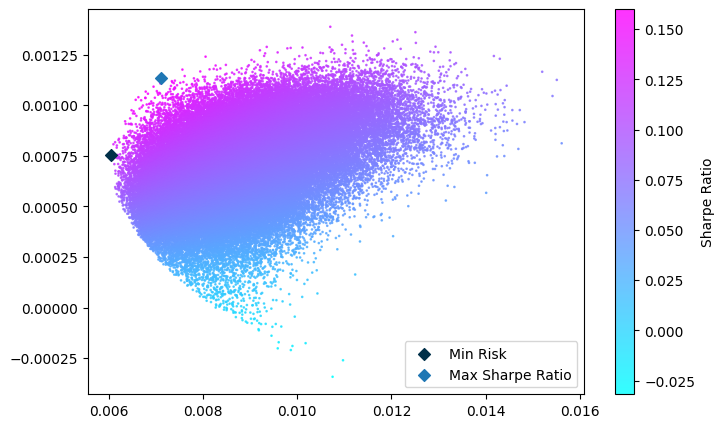

In [20]:

np.random.seed(123)

num_points, points = 100000, []
min_risk_portfolio, max_sr_portfolio = None, None
min_risk, max_sr = float('inf'), -float('inf')


'''Generating random portfolios, normalizing them,
finding the respective return, risk and sharpe ratio'''
for i in range(num_points):
  weights = np.random.rand(n_assets)
  weights /= weights.sum()
  exp_ret = m @ weights.T
  risk = np.sqrt(weights @ C @ weights.T)
  sr = exp_ret / risk
  points.append([exp_ret, risk, sr])
  if(risk < min_risk):
    min_risk_portfolio, min_risk = weights, risk
  if(sr > max_sr):
    max_sr_portfolio, max_sr = weights, sr

points = pd.DataFrame(points, columns=["mu", "sigma", "sharpe_ratio"])
plt.figure(figsize=(8, 5))
plt.scatter(points["sigma"], points["mu"], c=points["sharpe_ratio"], alpha=0.8, s=0.8, cmap="cool")
plt.colorbar(label="Sharpe Ratio")

'''Plotting portfolios with Max Sharpe Ratio and Min Risk'''
max_sharpe_idx = points.idxmax()["sharpe_ratio"]
min_risk_idx = points.idxmin()["sigma"]
plt.scatter(points.iloc[min_risk_idx, 1], points.iloc[min_risk_idx, 0], marker='D', label="Min Risk", c="#003049")
plt.scatter(points.iloc[max_sharpe_idx, 1], points.iloc[max_sharpe_idx, 0], marker='D', label="Max Sharpe Ratio")
plt.legend(loc="lower right")

print(f"Portfolio with Min risk:")
display_portfolio(min_risk_portfolio)
print(f"\n\nPortfolio with Max Sharpe Ratio:")
display_portfolio(max_sr_portfolio)



### __Efficient Frontier__
Efficient Frontier is defined as set of portfolio at given risk tolerance offering max return or vice-versa

$
min \; wCw^T \; s.t. \; mw^T=\mu \; and \; \sum_{i}{} w_i = 1
$


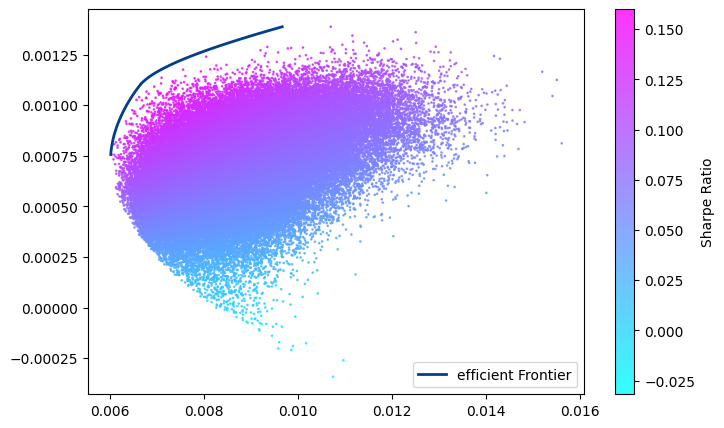

In [61]:


eff_frontier_mus = np.linspace(points.iloc[min_risk_idx, 0], points["mu"].max(), 100)
eff_frontier_sigma = []

def get_risk(weights:np.ndarray):
  return np.sqrt(weights@C@weights.T)

def get_return(weights:np.ndarray):
  return m@weights.T

def check_sum(weights:np.ndarray):
  #ensures sum of weigths = 1
  return np.sum(weights)-1

init = [1/n_assets for _ in range(n_assets)]
bounds = [(0, 1) for _ in range(n_assets)]

for ret in eff_frontier_mus:
  # using convex optimization (quadratic prog.) for each return to minimise risk
  cons = (
    {"type": "eq", "fun":check_sum},
    {"type": "eq", "fun": lambda w:get_return(w)-ret}
  )
  result = optimize.minimize(get_risk, init, method='SLSQP', constraints=cons, bounds=bounds)
  eff_frontier_sigma.append(result['fun'])

plt.figure(figsize=(8, 5))
plt.plot(np.array(eff_frontier_sigma), eff_frontier_mus, c="#023e8a", linewidth=2, label="efficient Frontier")
plt.scatter(points["sigma"], points["mu"], c=points["sharpe_ratio"], alpha=0.8, s=0.8, cmap="cool")
plt.colorbar(label="Sharpe Ratio")

plt.legend(loc="lower right")

### __Portfolios with Max Return__
Efficient Frontier is defined as set of portfolio at given risk tolerance offering max return or vice-versa

$
max \; mw^T \; s.t. \; wCw^T=\sigma^2 \; and \; \sum_{i}{} w_i = 1  \\
OR \\ min \; -mw^T \; s.t. \; wCw^T=\sigma^2 \; and \; \sum_{i}{} w_i = 1
$


Point 1 Risk Tolerance: 0.006223402345495488
Optimal Weights:
AAPL=0.078	AMZN=0.006	GLD=0.58	GOOG=0.005	MSFT=0.274	XOM=0.056	
Return at this portfolio: 0.0009202357511283277

Point 2 Risk Tolerance: 0.008403764213451652
Optimal Weights:
AAPL=0.116	AMZN=0.163	GLD=0.317	GOOG=0.0	MSFT=0.403	XOM=0.0	
Return at this portfolio: 0.001179483078485233



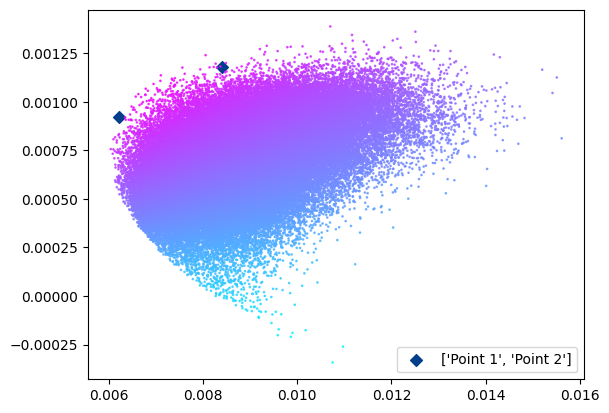

In [62]:
# np.random.seed(123)
# generating two random points on efficient frontier
random_indices = np.random.randint(0, len(eff_frontier_sigma), size=(2,))
risks = np.array(eff_frontier_sigma)[random_indices]
mus = []

def get_neg_return(weights:np.ndarray):
  # take negtive of return, since minimization probelm 
  return -get_return(weights)

for i, risk in enumerate(risks):
  cons = (
    {"type": "eq", "fun":check_sum},
    {"type": "eq", "fun": lambda w:get_risk(w)-risk}
  )
  result = optimize.minimize(get_neg_return, init, method="SLSQP", constraints=cons, bounds=bounds)
  mus.append((-result.fun))
  weights = result.x
  print(f"{'='*50}\nPoint {i+1} Risk Tolerance: {risk}")
  print("Optimal Weights:")
  display_portfolio(result.x)
  print(f"\nReturn at this portfolio: {-result.fun}\n")


# plotting the optimized portfolios 
plt.scatter(risks, mus, c="#023e8a", label=["Point 1", "Point 2"], marker='D')
plt.scatter(points["sigma"], points["mu"], c=points["sharpe_ratio"], alpha=0.8, s=0.8, cmap="cool")
plt.legend(loc='lower right')

